<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/2021/8OtherClasses/BlackBodyRadiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

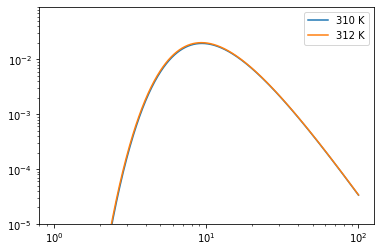

In [18]:
import numpy as np
import matplotlib.pyplot as plt

h=6.626e-34
c=2.998e8
k=1.381e-23

# 横軸=波長。対数目盛で等間隔になるように1〜100(μm)で1000点
L = np.logspace(0, 2, 1000)

def BlackBodyRadiation(L, T):
    E = h*c/(np.exp(h*c/(L*1e-6*k*T))-1) / (L*1e-6)**5
    return E

E310 = BlackBodyRadiation(L, 310)
E312 = BlackBodyRadiation(L, 312)

fig = plt.figure()
plt.loglog(L, E310, label="310 K")
plt.loglog(L, E312, label="312 K")
plt.ylim(1e-5, None)
plt.legend()
fig.savefig("blackbody.pdf")

In [13]:
BlackBodyRadiation(3, 310) / BlackBodyRadiation(3,312)

0.905609088954732

In [14]:
BlackBodyRadiation(10, 310) / BlackBodyRadiation(10, 312)

0.9704079912714483